# K-Nearest Neighbors (KNN) Regression

## Introduction

K-Nearest Neighbors (KNN) Regression is a supervised, non-parametric machine learning algorithm used to predict continuous target values.

Unlike Linear Regression, KNN does not assume any mathematical equation.  
Instead, it makes predictions based on the average of the K nearest data points in the feature space.

---

## 🔹 How KNN Regression Works

1. Choose the number of neighbors (K)
2. Calculate the distance between the new data point and all training data points
3. Select the K closest neighbors
4. Compute the average (or weighted average) of their target values
5. Return this average as the prediction

---

## 🔹 Distance Metrics

Common distance measures:
- Euclidean Distance (most common)
- Manhattan Distance
- Minkowski Distance

---

## 🔹 Key Characteristics

- Non-parametric (no fixed equation)
- Instance-based learning (lazy learning)
- Sensitive to feature scaling
- Performance depends heavily on choice of K

---

## 🔹 Choosing K

- Small K → Low bias, high variance (may overfit)
- Large K → High bias, low variance (may underfit)

---

## 🔹 Advantages

- Simple and easy to implement
- Works well for non-linear data
- No training phase required

---

## 🔹 Limitations

- Computationally expensive for large datasets
- Sensitive to irrelevant features
- Requires proper feature scaling

---

## 🔹 Applications

- House price prediction
- Demand forecasting
- Recommendation systems
- Any non-linear regression problem

---

In this notebook, we will:
- Implement KNN Regression
- Visualize predictions
- Tune the value of K
- Evaluate performance using regression metrics

### Import requirements 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_regression

### Load dataset 

In [10]:
data=fetch_california_housing()

In [11]:
X=data.data
y=data.target

### Train test split 

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
print("X_train shape::",X_train.shape)
print("X_test shape ::",X_test.shape)

X_train shape:: (16512, 8)
X_test shape :: (4128, 8)


In [14]:
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

### Knn Regression model 

In [15]:
model=KNeighborsRegressor(n_neighbors=11)

In [16]:
model.fit(X_train,y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
y_pred=model.predict(X_test)

In [18]:
r2_score(y_pred,y_test)

0.5791292842156364

### Check validation score of multiple KNN

In [19]:
scores=[]
for i in range(1,16):
    
    knn = KNeighborsRegressor(n_neighbors=i,weights='distance')
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    scores.append(r2_score(y_pred,y_test))

In [20]:
scores

[0.5219232428496776,
 0.5857435920056415,
 0.6002038729031192,
 0.6045204403960298,
 0.6050508253989582,
 0.6073694788766018,
 0.6056236630364664,
 0.6044055064951472,
 0.5989036860136576,
 0.5967327205356692,
 0.5930165537432662,
 0.5894909606688503,
 0.5864943469178543,
 0.5828886577346604,
 0.5805705753224357]

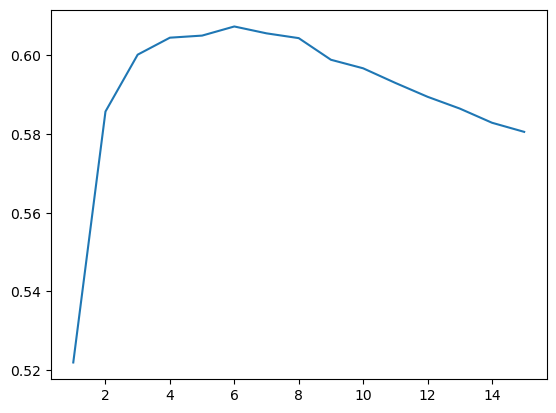

In [21]:
plt.plot(range(1,16),scores);

### Tarin KNN on Dummy dataset 

In [22]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_test = np.linspace(0, 5, 200).reshape(-1, 1)

knn = KNeighborsRegressor(n_neighbors=5, weights="distance")
knn.fit(X, y)

y_pred = knn.predict(X_test)

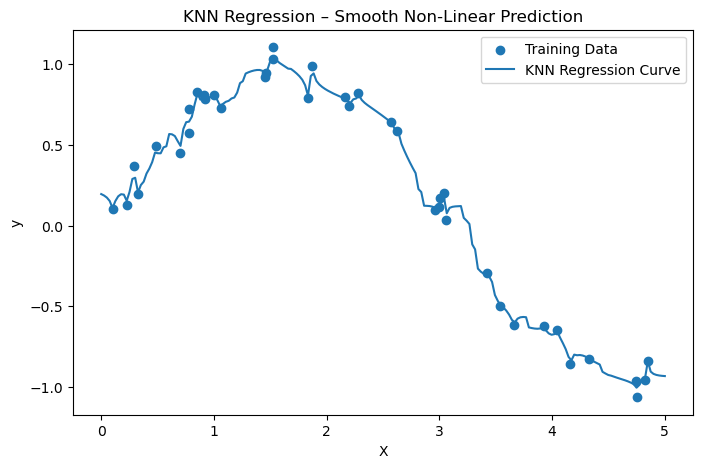

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Training Data")
plt.plot(X_test, y_pred, label="KNN Regression Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("KNN Regression – Smooth Non-Linear Prediction")
plt.legend()
plt.show()